### Introduction

I have chosen to do this assignment with my personal Toggl Track archive. Toggl is a time-tracking application that records time entries whenever a timer is manually started and stopped. Each entry corresponds to a logged work session and can be labeled with projects, task descriptions, and tags.

I began using Toggl at around the start of my sophomore year (October 2024). At the time, my motivation was practical, I wanted to understand how much time I was actually spending on assignments and pre-class work in order to manage my workload more intentionally. Like most Minervans, I felt busy, but I didn’t have a quantitative understanding of where my time was going.

Very quickly, the Toggl became more than a temporary measurement device. I noticed that I worked more efficiently when the stopwatch was running. The act of tracking introduced a mild accountability mechanism, where I felt like if the timer was on, the time needed to “mean something.” In that sense, the data is not just a passive record of behavior, but partially shaped by the act of measurement itself. Turning on the timer became a ritual for “locking in,” and over time it has become second nature, especially when beginning focused work or tracking hours for contracting roles.

Each row in this dataset represents a discrete focus block — a period of intentional, uninterrupted work. When I leave my laptop, get distracted, or shift context, I pause the timer. Because of this, I believe the durations recorded are fairly representative of true focused work time rather than ambient laptop time. The dataset therefore approximates my ability to sustain attention across different projects, times of day, and motivational states.

Up to this point, I have only looked at daily and weekly summaries to estimate workload (and ability to focus). I have never modeled the data. This project is therefore my first attempt to treat my own time as something that can be analyzed, characterized, and potentially predicted. The central question motivating this assignment is “Can I predict how much time I will spend on a particular task at a particular time of day?” If possible, such a model could serve as a realistic proxy for expected focus capacity. Instead of assuming, out of sheer willpower, that a task “should” fit into a certain time block, I could use historical behavioral data to estimate what is actually likely.

Rows (raw): 1340
Average session length: 46.44 minutes
Median session length: 37.69 minutes
Duration skewness: 5.75
99th percentile: 162.44 minutes


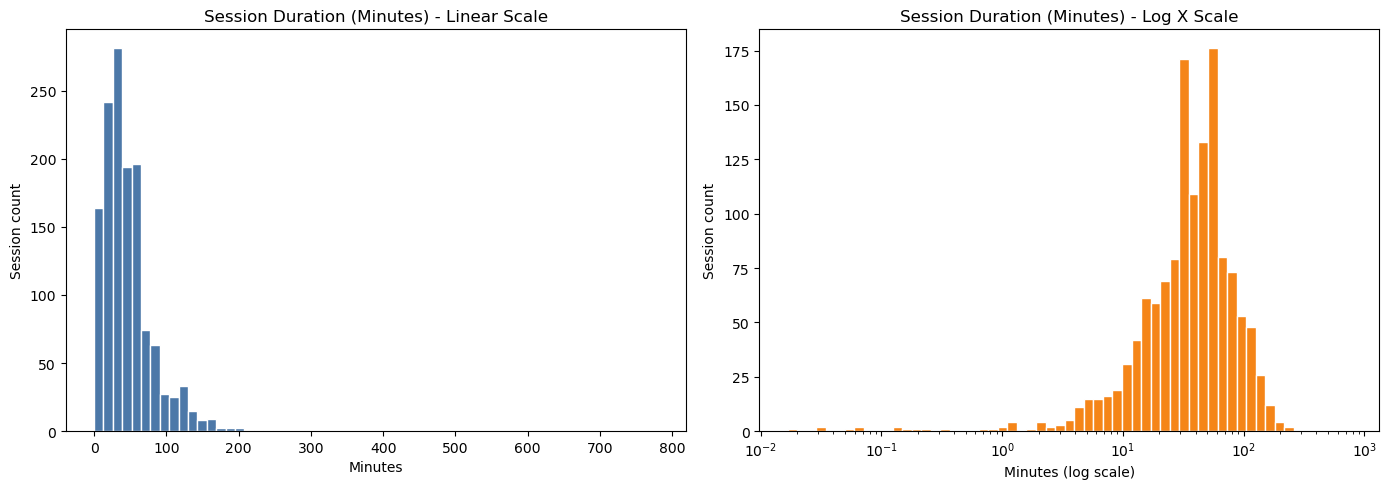

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
csv_path = 'TogglTrack_Report_Detailed_report_(from_10_01_2024_to_02_15_2026).csv'
df = pd.read_csv(csv_path)

# Clean obvious noise
for col in ['Description', 'Project', 'Tags']:
    if col in df.columns:
        df[col] = df[col].replace('-', pd.NA)

# Parse duration and keep valid sessions
df['duration_seconds'] = pd.to_timedelta(df['Duration'], errors='coerce').dt.total_seconds()

# Basic stats
raw_count = len(df)
mean_min = df['duration_seconds'].mean() / 60
median_min = df['duration_seconds'].median() / 60
skewness = df['duration_seconds'].skew()
p99_min = df['duration_seconds'].quantile(0.99) / 60

print(f'Rows (raw): {raw_count}')
print(f'Average session length: {mean_min:.2f} minutes')
print(f'Median session length: {median_min:.2f} minutes')
print(f'Duration skewness: {skewness:.2f}')
print(f'99th percentile: {p99_min:.2f} minutes')

# Visualize skew
dur_min = df['duration_seconds'] / 60
positive = dur_min[dur_min > 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear histogram: long right tail can dominate
axes[0].hist(positive, bins=60, color='#4C78A8', edgecolor='white')
axes[0].set_title('Session Duration (Minutes) - Linear Scale')
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Session count')

# Log-scale x-axis histogram: shape is easier to inspect
log_bins = np.logspace(np.log10(positive.min()), np.log10(positive.max()), 60)
axes[1].hist(positive, bins=log_bins, color='#F58518', edgecolor='white')
axes[1].set_xscale('log')
axes[1].set_title('Session Duration (Minutes) - Log X Scale')
axes[1].set_xlabel('Minutes (log scale)')
axes[1].set_ylabel('Session count')

plt.tight_layout()
plt.show()

